(-0.5, 6239.5, 4159.5, -0.5)

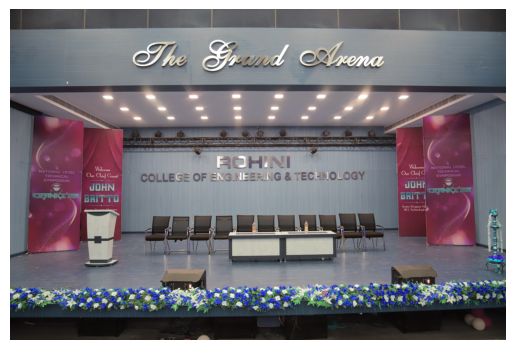

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib Inline
image = cv2.imread('H:/1.jpg')
plt.imshow(image)
plt.axis("off")

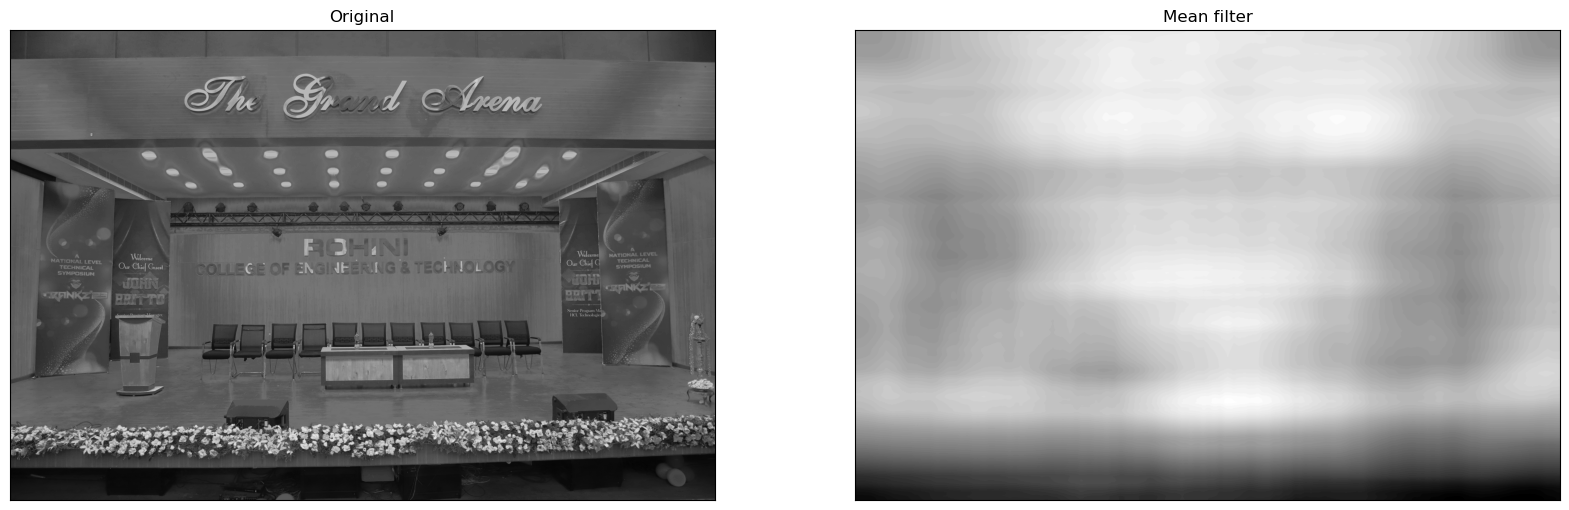

In [16]:
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 1000
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image2, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'), plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

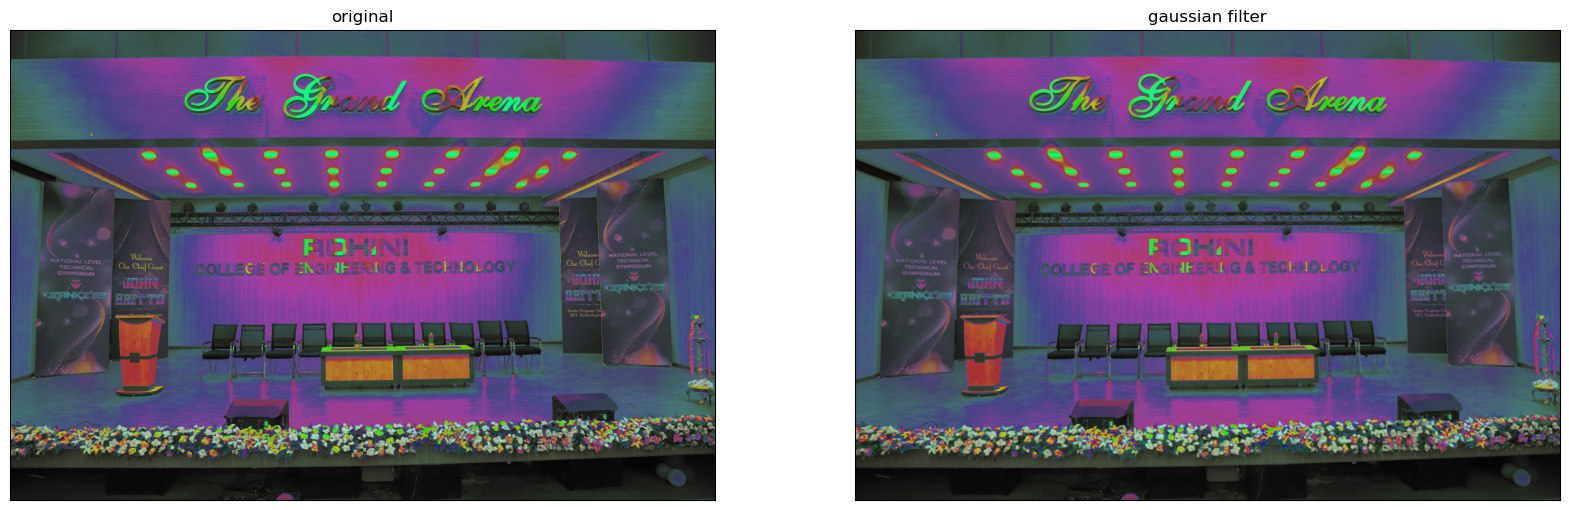

In [27]:
figure_size = 9
new_image = cv2.GaussianBlur(image, (figure_size,figure_size),20)
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('gaussian filter')
plt.xticks([]), plt.yticks([])
plt.show()

C:\Users\sujit\AppData\Local\Temp\ipykernel_12224\400887520.py:34: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  h=gaussian(kernel_size, kernel_size /3).reshape(kernel_size, 1)


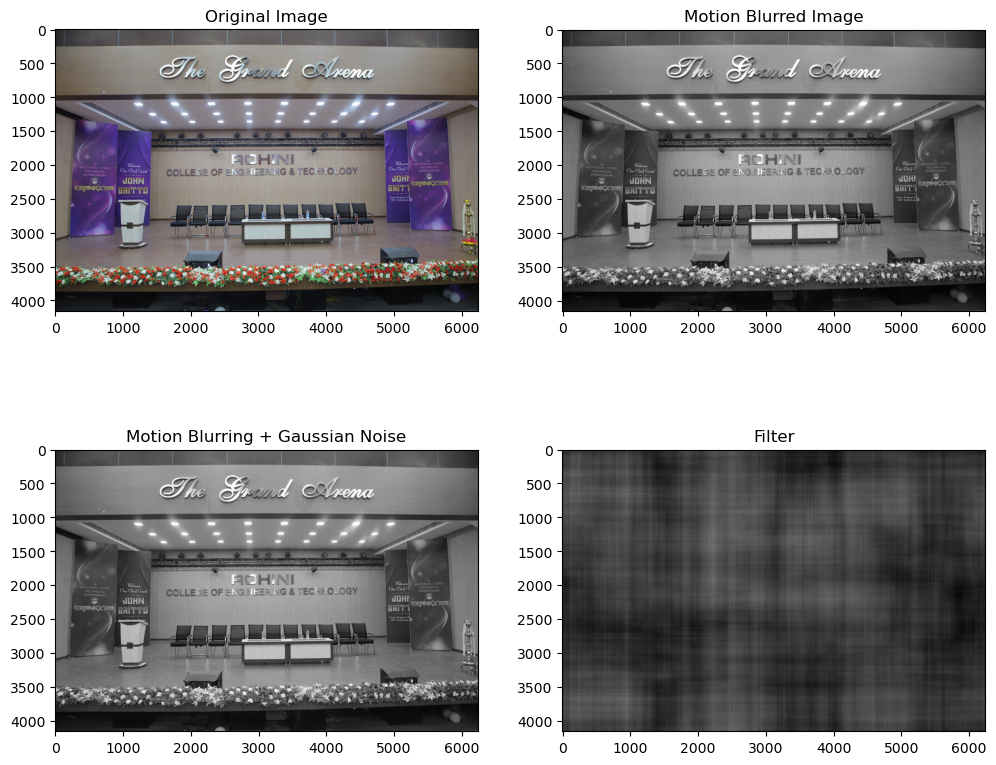

In [1]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
def blur(img, mode='box', kernel_size=3):
    dummy=np.copy(img)
    if mode == 'box':
        h = np.ones((kernel_size, kernel_size)) / kernel_size** 2
    elif mode == 'gaussian':
        h=gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
        h=np.dot(h, h.transpose())
        h/= np.sum(h)
    elif mode=='motion':
        h=np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode='valid')
    return dummy
def add_gaussian_noise(img, sigma):
    gauss=np.random.normal(0, sigma, np.shape(img))
    noisy_img=img + gauss
    noisy_img[noisy_img<0]=0
    noisy_img[noisy_img > 255]=255
    return noisy_img
def wiener_filter(img, kernel, k):
    kernel/=np.sum(kernel)
    dummy=np.copy(img)
    dummy=fft2(dummy)
    kernel=fft2(kernel, s=img.shape)
    kernel=np.conj(kernel) / (np.abs(kernel)**2+k)
    dummy=dummy*kernel
    dummy=np.abs(ifft2(dummy))
    return dummy
def gaussian_kernel(kernel_size=3):
    h=gaussian(kernel_size, kernel_size /3).reshape(kernel_size, 1)
    h=np.dot(h, h.transpose())
    h/=np.sum(h)
    return h

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
file_name=os.path.join("H:/1.jpg")
img=plt.imread(file_name)
img2=rgb2gray(plt.imread(file_name))

blurred_img=blur(img2, mode='motion', kernel_size=3)

noisy_img=add_gaussian_noise(blurred_img, sigma = 10)

kernel=gaussian_kernel(3)

filtered_img=wiener_filter(noisy_img, kernel, k=0) 
display=[img, blurred_img, noisy_img, filtered_img]

label=['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise','Filter']
fig=plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display [i], cmap='gray')
    plt.title(label[i])

plt.show()

In [ ]:
-